##The Frog Problem<br>
###Blake Rayvid
####Presented by Timandra Harkness and Matt Parker in [Can you solve The Frog Problem?](https://www.youtube.com/watch?v=ZLTyX4zL2Fc)

###Statement

Imagine some number of lillypads spanning a river, and a frog at one bank. The frog wants to cross the river. To jump forward, it randomly selects a lillypad (or the far bank) from the available ones ahead of it with equal probability, jumps there, and repeats this process until it has reached the opposite bank.

For a given number of initially available positions $n$ (the lillypads plus the far bank), what is the expected number of jumps for the frog to make it across?

###Solution

Let $k$ be some number of jumps, $ 1 \leq k \leq n$.

####1. List all possible paths for $(n,k)$

In [0]:
from scipy.special import comb # nCr function
from itertools import combinations # lists all combinations

The function ``routeMatrix(n,k)`` returns all possible routes for a given pair $(n,k)$ as a matrix $M$. This output matrix will have ${n-1 \choose k-1}$ rows, each representing a different route, and $k+1$ columns, since the initial position $0$ and the final position $n$ are the first and last entries in each row.

In [0]:
def routeMatrix(n, k):
  rows = comb(n - 1, k - 1, 1)
  cols = k + 1
  M = [[0 for x in range(cols)] for y in range(rows)]
  
  C = list(combinations(range(1, n), k - 1))
  
  for l in range(len(C[0])):
    for r in range(rows):
      M[r][l + 1] = C[r][l]
      
  for r in range(rows):
    M[r][cols - 1] = n
  
  return M

As an example, here is the matrix for $n=5$ and $k=3$, or all the ways the frog can move from position $0$ to position $5$ in exactly $3$ jumps:

In [3]:
routeMatrix(5,3)

[[0, 1, 2, 5],
 [0, 1, 3, 5],
 [0, 1, 4, 5],
 [0, 2, 3, 5],
 [0, 2, 4, 5],
 [0, 3, 4, 5]]

####2. Express the probability of any path length

Given that at each point all remaining positions have an equal chance of being selected: if the frog is at position $a$, the probability that the frog will then select the $b^{th}$ position (where $b>a$) equals $\frac{1}{n-a}$. For example, if $n=4$ and the frog is at position $2$, each of the remaining positions $(3,4)$ have a $\frac{1}{4-2}=\frac{1}{2}$ chance of being selected.
<br><br>
To find the probability that a certain route $r\in\{1,2,...,{n-1 \choose k-1}\}$ is taken, multiply the probabilities of each successive jump in the sequence (i.e. each entry in that row):
<br><br>
$$P(r)=\prod_{j=1}^{k} \frac{1}{n-M_{r,j}}.$$
<br><br>
Since each route is unique and the list is exhaustive, the probability of the frog jumping exactly $k$ times to reach the far bank is the sum of the probabilities of each route of length $k$ occuring (i.e. sum the above result for all rows):
<br><br>
$$P(k)=\sum_{i=1}^{{n-1 \choose k-1}} \prod_{j=1}^{k} \frac{1}{n-M_{i,j}},$$
<br><br>
where $M_{i,j}$ is the entry in the $i^{th}$ row and $j^{th}$ column of $M$ (indexed from $1$), and $M$ is the particular route matrix for the pair $(n,k)$.

The function ``pathLengthProbability(n,k,m)`` implements the above formula, returning $P(k)$ for a given $(n,k)$ and a corresponding matrix $M$:

In [0]:
def pathLengthProbability(n, k, m):
  iLower = 1
  iUpper = comb(n - 1, k - 1, 1)
  jLower = 1
  jUpper = k
  
  sumTot = 0
  for i in range(iLower - 1, iUpper):
    prod = 1
    for j in range(jLower - 1, jUpper):
      factor = 1 / (n - m[i][j])
      prod = prod * factor
    sumTot += prod
  
  return sumTot

The function ``lengthProb(n,k)`` wraps ``pathLengthProbability(n,k,m)`` and ``routeMatrix(n,k)`` for ease of use, returning $P(k)$ for a particular pair $(n,k)$:

In [0]:
def lengthProb(n, k):
  if k <= n and k >= 1:
    return pathLengthProbability(n, k, routeMatrix(n, k))
  else:
    print("Bad input")
    return 0

####3. Express the expected number of steps

The expectation of a discrete random variable $X$ is defined as the sum over the sample space $\Omega$:
<br><br>
$$E(X)=\sum_{\omega\in\Omega}x_{\omega}P(x_{\omega}).$$
<br>
Therefore the solution to the frog problem, the expected number of steps for a given $n$, is:
<br><br>
$$E(steps)=\sum_{k=1}^{n}k\sum_{i=1}^{{n-1 \choose k-1}} \prod_{j=1}^{k} \frac{1}{n-M_{i,j}}.$$
<br><br>

*Note: $M$ will change for each term in the outer sum. A new one must be computed for each value of $k$.*

The function ``expectedSteps(n)`` returns the above quantity given some $n$:

In [0]:
def expectedSteps(n):
  sumTot = 0
  for k in range(1, n + 1):
    sumTot += (k * lengthProb(n, k))
  return sumTot

###Examples

####Find the probability that $k=1$ given $n=5$

In [7]:
lengthProb(5,1)

0.2

####Find the expected number of steps for $n=10$

In [8]:
expectedSteps(10)

2.9289682539682538

####Plot the expected steps for several $n$

In [0]:
from matplotlib import pyplot as pl
import numpy as np

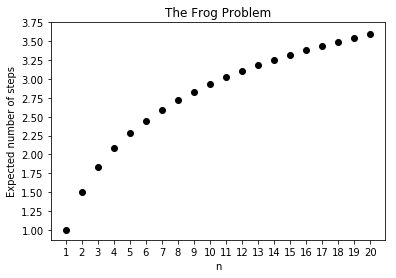

In [10]:
ns = range(1, 21)
exps = []
for n in ns:
  exps.append(expectedSteps(n))
pl.plot(ns,exps,'ko')
pl.xlabel('n')
pl.ylabel('Expected number of steps')
pl.title('The Frog Problem')
pl.xticks(np.arange(min(ns), max(ns) + 1, 1))
pl.yticks(np.arange(min(exps), max(exps) + 0.25, 0.25))
pl.show()